In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import seaborn as sns

import matplotlib.pyplot as plt
import pickle

In [2]:
data=pd.read_csv('E:\DATA SCIENCE COURSE\Practice projects\DSData-master\happiness_score_dataset.csv')

In [3]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
##the data shows all the 12 headers

In [5]:
data.shape

(158, 12)

In [6]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
## The above data represents
#1. Thers is no null value present in the data as the count is same=158
#2. The happiness rank is the categorical data, and representing the rank of the respective countries and can be dropped.
#3. Happiness score would be our lable, what we need to predict after model building
#4. Rest of the parameters are the dependent variable and help in predicting the data.
#5. Data set seems to be smooth as there is not much variation between mean and standard deviation

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
#6. The country and region can also be dropped, as the datatype is string

In [10]:
data=data.drop(columns=('Country'))

In [11]:
data=data.drop(columns=('Region'))

In [12]:
data=data.drop(columns=('Happiness Rank'))

In [32]:
data.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [34]:
df= data

In [26]:
y= data['Happiness Score']

In [28]:
x= data.drop(columns=['Happiness Score'])

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>

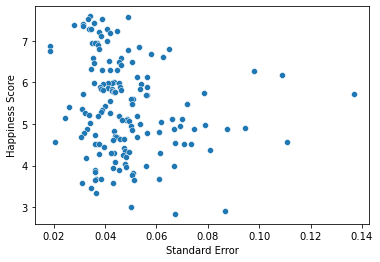

In [35]:
sns.scatterplot(x="Standard Error", y="Happiness Score",data=df)

In [ ]:
##Standard Error seems constants w.r.t Hapiness Score on an average

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

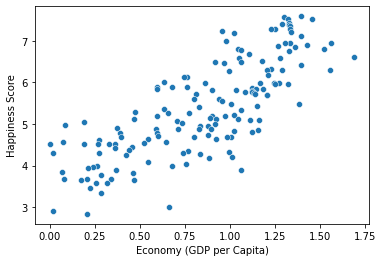

In [36]:
sns.scatterplot(x="Economy (GDP per Capita)", y="Happiness Score",data=df)

In [ ]:
###economy is directly related to happiness score

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

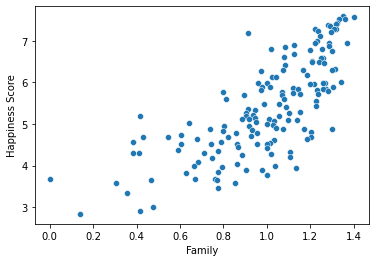

In [37]:
sns.scatterplot(x="Family", y="Happiness Score",data=df)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

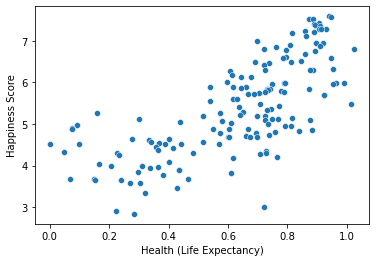

In [38]:
sns.scatterplot(x="Health (Life Expectancy)", y="Happiness Score",data=df)

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

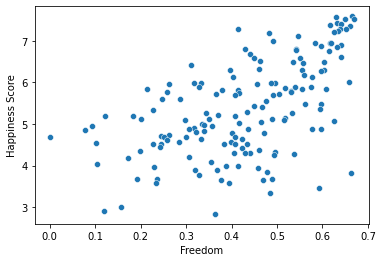

In [39]:
sns.scatterplot(x="Freedom", y="Happiness Score",data=df)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

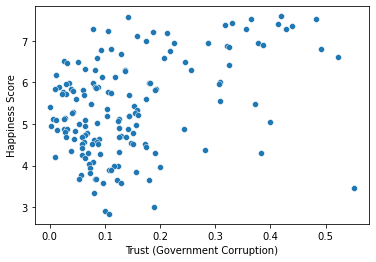

In [40]:
sns.scatterplot(x="Trust (Government Corruption)", y="Happiness Score",data=df)

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

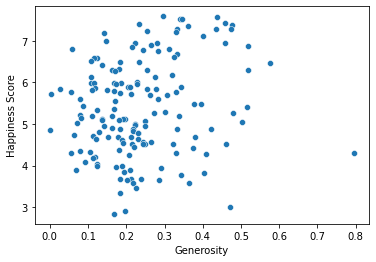

In [41]:
sns.scatterplot(x="Generosity", y="Happiness Score",data=df)

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

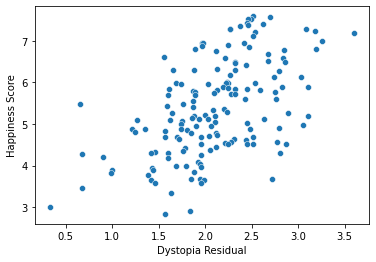

In [42]:
sns.scatterplot(x="Dystopia Residual", y="Happiness Score",data=df)

In [76]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [ ]:
##data scaling
##remove skewness

In [43]:
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)
x_scaled

array([[-0.80592569,  1.36962124,  1.32028142, ...,  2.30965159,
         0.47103971,  0.75825809],
       [ 0.05588945,  1.13522625,  1.51445776, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-0.8544869 ,  1.19286069,  1.36105403, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 0.13253425, -0.45524543, -1.90108634, ...,  0.38141902,
         1.85689094, -3.20843049],
       [ 2.26396166, -2.06756644, -2.1184666 , ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.13418227, -1.58633379, -3.13472485, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

In [ ]:
##split the data for training and testing

In [46]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=200)

In [47]:
y_train.head()
regression= LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [48]:
data.tail(2)

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [ ]:
#test the  data and got desired result

In [49]:
print('Happiness Score', regression.predict(scaler.transform([[0.08658, 0.01530, 0.41587, 0.22396, 0.11850,0.10062,0.19727, 1.83302]])))

Happiness Score [2.90462576]


In [ ]:
##saved the file

In [50]:
filename='HappinessScore predictor.pickle'
pickle.dump(regression,open(filename,'wb'))

In [51]:
regression.score(x_train, y_train)

0.9999999422069534

In [52]:
regression.score(x_test,y_test)

0.9999999330523829

In [ ]:
##used lasso ridge technique to resolve overfitting problem

In [53]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [54]:
##lasso regularization

In [55]:
lasscv=LassoCV(alphas=None, max_iter=1000, normalize=True)
lasscv.fit(x_train, y_train)

LassoCV(normalize=True)

In [57]:
alpha=lasscv.alpha_
alpha

8.137742011561584e-05

In [58]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=8.137742011561584e-05)

In [ ]:
##the score seems is similar to the previous score

In [60]:
lasso_reg.score(x_test, y_test)

0.99999993185201

In [71]:
ridgecv= RidgeCV(alphas=(0.001, 0.1,0.01), normalize=True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.1  , 0.01 ]), normalize=True)

In [72]:
ridgecv.alpha_

0.001

In [74]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [75]:
ridge_model.score(x_test, y_test)

0.9999999341434519

In [ ]:
## the ridge score is also same to the previous one. So our model is ready.